<center>
    <img src="./images/msp_header.png">
</center>

#### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta

# Filters and Windows

In [1]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/CmwHW7PBNf8" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

Last time we saw how we can obtain the impulse response of the ideal low pass filter, the sinc function. The problem of this impulse response is, that it is non-causal, and we also cannot make it causal because it starts at minus infinity (we cannot add infinite delay).

<img src="./images/msp_05_01_sinc_function.png" width=500>

Assume we would like to have a causal Finite Impulse Response (**FIR**) low pass filter, meaning the impulse response starts a time 0 and extents over only a finite amount of samples, n=0,…,L-1, for a length L. (Observe that FIR filters have no correspondence in the analog domain, analog filters always have an infinite impulse response, **IIR**)

How do we design this filter such that it becomes “similar” in some sense to the ideal? (Since we cannot get the ideal filter)

In [2]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/sdq1OOnQass" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

**Example:** Design an anti-aliasing filter for sampling rate conversion: The original signal is from a CD with 44.1 kHz sampling rate, hence an audio bandwidth of about up to  around 20 kHz, and we would like to downsample it to 22 kHz sampling rate, for example for a Mac computer. In order do be able to downsample it, we first have to low pass filter it, for instance the pass-band should be from 0 to 9 kHz, and the stop-band, to avoid aliasing of frequencies above 11 kHz, should be from 11 kHz on to the maximum (here: 22.05 kHz). Since we don't have an ideal filter, we need to include a “transition” band, here from 9kHz to 11 kHz, to let the filter “transition” from pass band to stop band, with intermediate attenuations.

Aliasing is something that is easily perceivable by the ear, hence we would like to have **at least 60 dB** attenuation from 11 kHz and up. The passband can take some ripples in the frequency response, for instance ± 2 dB (corresponding to about ±25% in voltage). The frequency range from 9 kHz to 11 kHz is the so-called transition band, which gives the filter space to build up its attenuation from 0 to 60 dB, to make sure it already has this 60 dB at 11 kHz frequency. In this way we can formulate requirements for a “similarity” of our filter, even though we know we cannot reach the optimum (a practical approach).
 
A first (perhaps naïve) approach is to define the similarity as the quadratic error of the frequency response of our FIR filter to our given ideal frequency response (mostly this means the magnitude of the frequency response). This has the advantage of being mathematically very simple. This means our goal is to **minimize** this **quadratic error**. Assume our desired frequency response is $H_d(\omega)$, and the (real)  frequency response of our causal FIR filter is $H(\omega)$. Then the quadratic error $e$ is

$$ \large
 {e= \int _{ {0} } ^ { {2π} }  { \mid H_ {{d} }  ( ω )  - { H ( ω )}  \mid  ^ { {2} } dω} } {}
$$


In [3]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/a_yqL6It91k" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

We would like to make this error *e* as small as possible.
Observe that we need an integral here because the frequency domain signal is continuous, since the time domain signal is not periodic (only then would the Fourier transform be discrete over the frequency). But here we have the sinc function with infinite extent over time. Observe that because of this we also cannot apply the Discrete Fourier Transform, because it is made for periodic signals with a finite period (the DFT is usually applied just to this finite period). But the Discrete Time Fourier Transform is for discrete time signals with infinite period.

We need to minimize the quadratic error *e* to find the best approximation with our FIR filter. We cannot solve this problem in the frequency domain, but we can solve the equivalent formulation in the time domain.

To obtain this, we use the so-called **Parseval Theorem**, which states that the power of a signal (the sum of its magnitude squared) is the same in the time- and in the frequency-domain (this is true for the Discrete Time Fourier Transform as well as for the DFT).

$$ \large
 {e= \int_{ {0} }  ^{ {2π} }  { \mid H _ { {d} }  ( ω )  - H ( ω )\mid ^ { {2} } dω= \sum _{ {n= -  \infty } } ^ { { \infty } }  { \mid h _ { {d} }  ( n )  - h ( n )  \mid  ^ { {2} } } } } {}
$$

The beauty here is now, that we obtain a sum, which we now can compute more easily (remember: We want to obtain h(n)).

For our ideal low pass filter, $h_d(n)$ was the sinc function. To obtain a causal filter, we already allowed a time shift $n_d$ for the ideal impulse response (using our FIR filter h(n) makes causality possible). Plugging this into the above equation yields:

$$ \large
{e= \sum _{ {n= -  \infty } }  ^ { { \infty } }  { \mid \frac    {sin (  ( n - n _ { {d} }  ) \omega_{{p} }  ) }   { ( n - n _ { {d} }  ) \omega_ { {p} } } }  - h ( n )  \mid  ^ { {2} } } {}
$$

How should we choose h(n) and delay $n_d$ to obtain the minimum possible quadratic error e for a given length L of h(n)?

Given **the length L**, we need to determine the **L coefficients h(n)** and the **delay parameter $n_d$**.

To make the solution more easy to see, we can **divide** the sum into 2 parts, one over the extend of h(n) and one for the rest:

$$ 
{e= \sum _{ {n= 0 } }  ^ { { L - 1} }  { \mid \frac    {sin (  ( n - n _ { {d} }  ) \omega_{{p} }  ) }   { ( n - n _ { {d} }  ) \omega_ { {p} } } }  - h ( n )  \mid  ^ { {2} } } {}
+{ \sum _{ {n<0 } }  ^ { { n>L-1 } }  { \mid \frac    {sin (  ( n - n _ { {d} }  ) \omega_{{p} }  ) }   { ( n - n _ { {d} }  ) \omega_ { {p} } } }   \mid  ^ { {2} } } {}
$$

Both terms are positive, so to minimize e we have to minimize both terms. To minimize the right hand term, we only have $n_d$. We can choose $n_d$ such only the smallest values appear there, and that the biggest values of $h_d$ are not “seen” by the right hand sum, and covered by h(n) in the left hand sum. We can imagine the left hand sum being a so-called “rectangular window”, where we can shift the sinc function over this window function to obtain h(n). 

The rectangular window is a function which has the value 1 inside the window length and the value 0 outside the window length. The finite sum can be imagined as resulting from first multiplying the infinite sinc function with this rectangular window, and then compute the sum, which hence becomes finite.

The goal here would be to shift the sinc function, using the delay $n_d$, such that the window for h(n) “sees” the **biggest values** of the sinc  function. Observe that this leads to a contiguous impulse response. Using the above formulas, it would also be possible to just pick the **biggest magnitude** values of the  sinc function for h(n) (the maxima and minima), for a non-contiguous impulse response, which would lead to a smaller quadratic error for L coefficients! (Question: How would the resulting frequency response look like?).

Assume L=2, then we have a filter with 2 coefficients. The biggest 2 values in the sinc function are around  the center, around zero, hence we would like to choose $n_d=0.5$ (a delay of half a sample), so that the new center is around n=0.5, and the right hand side sum “sees” only the smaller values. In general we would like to choose $n_d=(L-1)/2$, meaning we shift the **maximum** of the sinc function exactly in the **center** of our window for h(n).

What do we do with the left hand side (inside our window)? We choose h(n) identical to $h_d(n)$, and the left hand sum (with the window) becomes indeed zero!

This way we get a simple “recipe” for designing an FIR filter with minimum squared error: Take the center of the sinc function (or the ideal impulse response $h_d$), and window it with a so-called “**rectangular” window** (because it has a rectangular form in time or space. Inside the sum for h(n) this imagined window has a value of 1, and outside it has a value of 0).

![sinc_window](./images/msp_05_02_sinc_window.jpg)

This imagined window function will become more interesting if we modify the values from 1 to other values.
We can see: FIR filter = Sinc function **times** the rectangular window.

**Observe:** If we only use a finite piece of the Sinc function as our filter, we **implicitly** already applied a **rectangular window**. Hence there is no need to apply it explicitly any more.

This **multiplication** of the rectangular window with the ideal impulse response in the **time domain** becomes a **convolution** of the DTFT of the rectangular window with the ideal frequency response in the **frequency domain**. In this way we can see the result in the frequency domain. In effect, the ideal  frequency response (of the sinc function) is “blurred” by convolving it with the DTFT of the window function. Ideally, this DTFT of the window should be an impulse at frequency zero, because then the convolution would not change the ideal frequency response.  But this would mean an infinitely long window in the time domain. We have a finite rectangular window in the time domain which becomes another **Sinc function** in the **frequency domain**, quite different from a pulse at frequency zero!

**Oberve:** The longer the window in the time domain, the more narrow its sinc function in the frequency domain becomes, and the more similar to an impulse. Hence, for better filters we need a longer window!

Lets see what we really have, in iPython, with window:

In [4]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/xagyL2eWzyg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

<IPython.core.display.Javascript object>


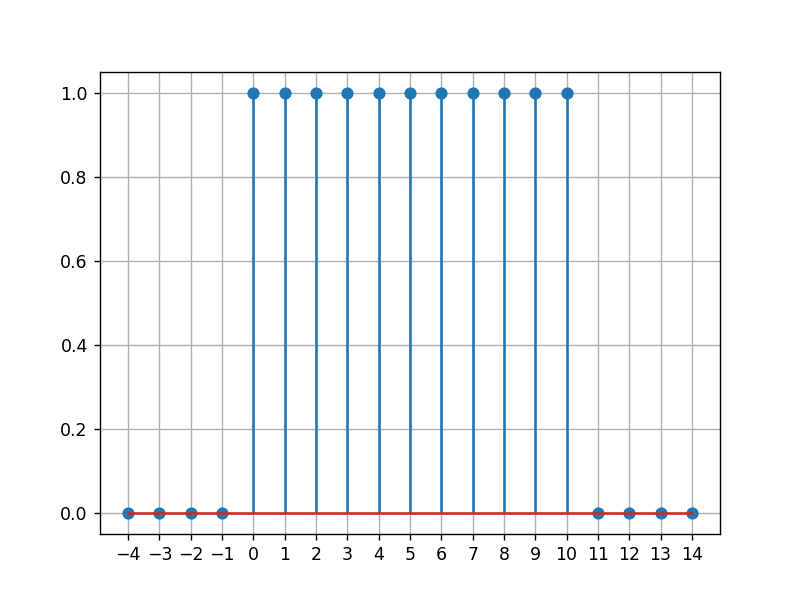

In [5]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

L=11
h = np.concatenate((np.zeros(4),np.ones(L),np.zeros(4)),axis=0)
plt.figure()
plt.stem(np.arange(-4, L+4, step=1), h, use_line_collection=True)
plt.xticks(np.arange(-4, L+4, step=1))
plt.grid();

<IPython.core.display.Javascript object>


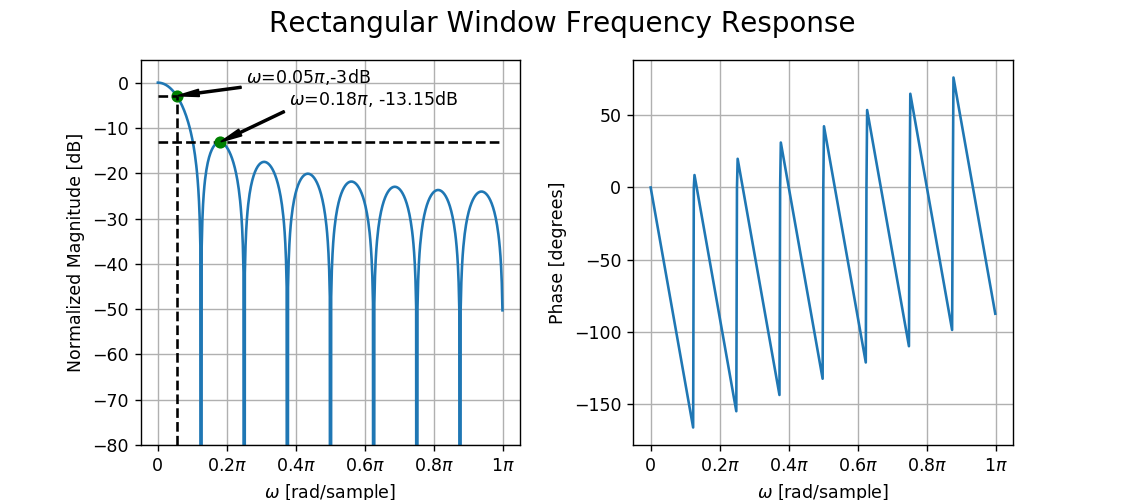

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), Checkbox(value=False, description=…

In [6]:
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy.signal import argrelextrema
import scipy.signal as signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
fig.suptitle('Rectangular Window Frequency Response', fontsize=16)
plt.subplots_adjust(wspace=0.3)

@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16),unwrap=False)
def plot_recWindow_H(L=16, unwrap=False):
    h = np.concatenate((np.ones(L),np.zeros(4)),axis=0)
    omega, H =signal.freqz(h[:-4],worN=512)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H)/np.abs(H).max())
    p3dB=np.max(H_dB)-3
    p3dBIndex= np.max(np.where(H_dB >= p3dB))
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    ax1.clear()
    ax1.plot(omega, H_dB)
    ax1.plot(wp, Hp,'go')
    ax1.plot((0, wp), (Hp, Hp), 'k--') 
    ax1.plot((wp, wp), (-80, Hp), 'k--') 
    ax1.set_ylim((-80,H_dB.max()+5))
    ax1.annotate(r'$\omega$={:.2f}$\pi$,-3dB'.format(wp/np.pi), xy=(wp, Hp), xytext=(wp+0.2*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H), np.greater)[0][0]
        ax1.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--') 
        ax1.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]), 
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(omega[side_lobe]+0.2*np.pi, -5),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax1.plot(omega[side_lobe], H_dB[side_lobe],'go')
        
    ax1.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax1.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax1.grid(True)
    ax1.set_xlabel(r'$\omega$ [rad/sample]')
    ax1.set_ylabel(r'Normalized Magnitude [dB]')
    
    
    ax2.clear()
    phase=np.angle(H,deg=True)
    if unwrap:
        phase=np.unwrap(phase)
    ax2.plot(omega,phase)
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
    ax2.grid(True)
    ax2.set_xlabel(r'$\omega$ [rad/sample]')
    ax2.set_ylabel(r'Phase [degrees]')
    

Here we can see that it is far from being an impulse at frequency zero. In fact it is somewhat broad and also the attenuation is not very high, on the order of -15 to -20 dB. We expect that our resulting low pass filter will “inherit” these properties through the convolution in the frequency domain.

The “pass band” or main lobe width of our window function will determine the **transition band width** of our resulting filter, and the stop band attenuation of the window will determine the **resulting stop band attenuation** of our filter.

This shows that the **window function shapes the key characteristics** of our resulting FIR filter!


**Example**: Take our example of a downsampling filter which should attenuate frequencies starting at 11 kHz, at a sampling rate of 44.1 kHz. We would like to have -60 dB attenuation in the stopband. Hence we obtain the normalized frequency for the start of our stop band as:
$$\large
\omega_s=\frac{11 }{ 44.1 }\cdot 2 \cdot \pi \approx 0.5 \cdot \pi
$$

Hence our desired frequency response is 1 between frequency 0 and $\omega_s$ (or better: between $-\omega _s$ to $\omega _s$ to also include the negative frequency axis). Now take the inverse DTFT of the ideal, desired frequency response $H_d(\omega)$ to obtain the ideal impulse response $h_d(n)$. Since at first we assume an ideal filter, we set the end of the pass band $\omega_c$ identical to the beginning of the stop band, $\omega_c=\omega_s$:

$$\large
h_d(n)= \frac{1} {2 \pi} \cdot \int _{\omega=-\pi} ^ \pi H_d(\omega) e^{j \omega n} d \omega= $$

$$\large
=\frac {1}  {2 \pi} \cdot \int _{\omega=-\omega_c} ^ {\omega_c}  e^{j \omega n} d \omega =
$$

$$\large
= \frac{1}  {2 \pi} \left(\frac {e^{j \cdot \omega_c n}} {j \cdot n}- \frac{e^{-j \cdot \omega_c n}} {j \cdot n}\right)=  \frac{sin(\omega_c n)}  {\pi n}
$$

(remember: $sin(\omega)=\frac{1} {2j} \cdot (e^{j \omega} -e^{-j \omega})$ )



## Approximation of an Ideal Low Pass Filter using a Rectangular Window and Delay

We've seen that the impulse response of an ideal low pass filter is:

$$\large
h(n)=\frac{sin(\omega_c \cdot n)}{\pi \cdot n }$$

Truncating the impulse response (multiplying by a rectangular window) so it has a **length L** and applying a **delay of $n_d=\frac{(L-1)}{2}$** we have:

$$\large
h(n)=\frac{sin\left(\omega_c \cdot (n-n_d)\right)}{\pi \cdot (n-d_d)} = 
\frac{sin\left(\omega_c \cdot \left(n-\frac{(L-1)}{2}\right)\right)}{\pi \cdot \left(n-\frac{(L-1)}{2}\right)}
$$



In [7]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/AuuucABMpvg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [8]:
from sympy import sin, symbols, simplify, pi, lambdify, limit

wc_s = symbols('\omega_c')
n_s, L_s = symbols('n L', integer=True)

n_d_s=(L_s-1)/2
h_n_s=sin(wc_s*(n_s-n_d_s))/(pi*(n_s-n_d_s))
h_n_s

sin(\omega_c*(-L/2 + n + 1/2))/(pi*(-L/2 + n + 1/2))

In [9]:
h_0_s = limit(h_n_s,n_s,n_d_s)
h_0_s

\omega_c/pi

<IPython.core.display.Javascript object>


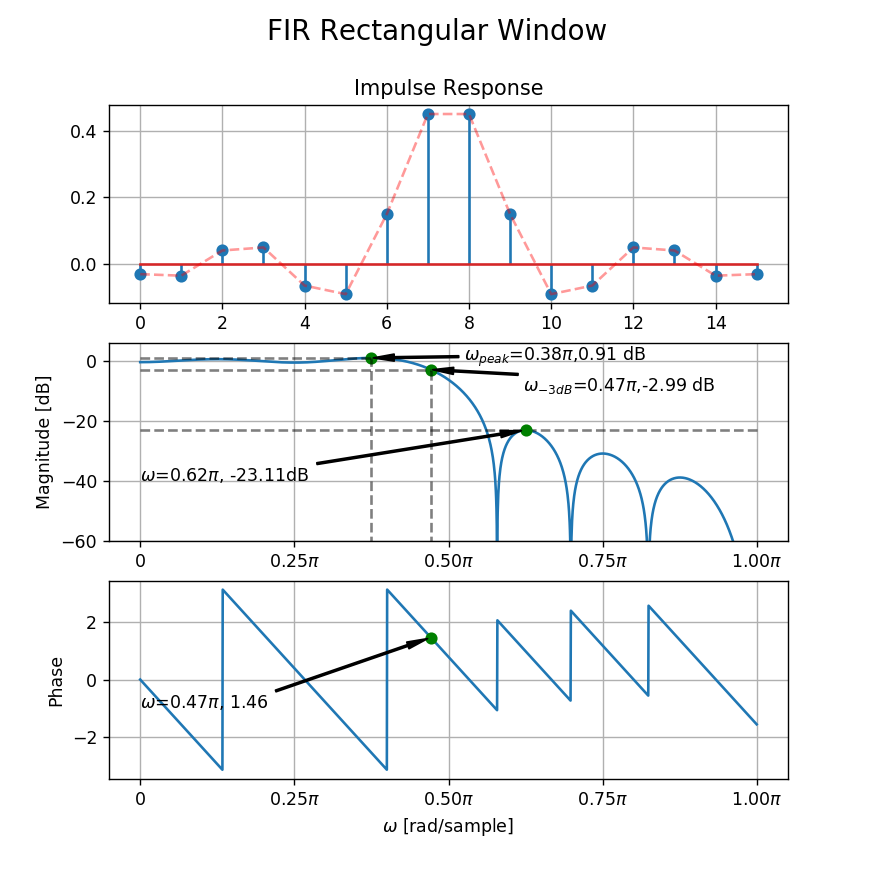

interactive(children=(IntSlider(value=16, description='L', max=128, min=2), FloatSlider(value=0.5, description…

In [11]:
h_n=lambdify((wc_s,n_s,L_s), h_n_s, 'numpy')

fig1, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(7,7))
fig1.suptitle('FIR Rectangular Window', fontsize=16)
plt.subplots_adjust(wspace=0.3)


@interact(L=widgets.IntSlider(min=2, max=128, step=1, value=16), 
          wc=widgets.FloatSlider(min=0.1, max=1, step=0.01, value=0.5), unwrap=False)
def plot_h(L=16, wc=0.5,unwrap=False):
    wc=wc*np.pi
    n=np.arange(L)
    n_d=n_d_s.subs(L_s,L).evalf()
    if L%2==0:
        h=h_n(wc,n,L)
    else:
        h=np.ones(L)
        for i in range(L):
            if i==n_d:
                h[i]=wc/np.pi
            else:
                h[i]=h_n(wc,i,L)
    ax1.clear()
    ax1.stem(h, use_line_collection=True)
    ax1.plot(h,'r--',alpha=0.4)
    ax1.set_title(r'Impulse Response')
    ax1.grid()
    
    omega, H =signal.freqz(h,worN=2048)
    H[np.abs(H) < np.finfo(float).eps] = np.finfo(float).eps
    H_dB=20*np.log10(np.abs(H))
    p3dB=-3
    p3dBIndex_down= np.max(np.where(H_dB >= p3dB))
    p3dBIndex_up= np.min(np.where(H_dB <= p3dB))
    print(H_dB[p3dBIndex_down])
    print(H_dB[p3dBIndex_up])
    if (np.abs(p3dB-H_dB[p3dBIndex_down]) >= np.abs(p3dB-H_dB[p3dBIndex_up])):
        p3dBIndex=p3dBIndex_up
    else:
        p3dBIndex=p3dBIndex_down
    wp=omega[p3dBIndex]
    Hp=H_dB[p3dBIndex]
    max_peak_ind=np.argmax(H_dB)
    
    ax2.clear()
    ax2.plot(omega, H_dB)
    ax2.plot(omega[max_peak_ind], H_dB[max_peak_ind],'go')
    ax2.plot((0, omega[max_peak_ind]), (H_dB[max_peak_ind], H_dB[max_peak_ind]), 'k--',alpha=0.5) 
    ax2.plot((omega[max_peak_ind], omega[max_peak_ind]), (-80, H_dB[max_peak_ind]), 'k--',alpha=0.5)
    ax2.annotate('$\omega_{{peak}}$={:.2f}$\pi$,{:.2f} dB'.format(omega[max_peak_ind]/np.pi,H_dB[max_peak_ind]), 
                 xy=(omega[max_peak_ind],H_dB[max_peak_ind]), xytext=(omega[max_peak_ind]+0.15*np.pi, 0),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4))
    ax2.plot(wp, Hp,'go')
    ax2.plot((0, wp), (Hp, Hp), 'k--', alpha=0.5) 
    ax2.plot((wp, wp), (-80, Hp), 'k--',alpha=0.5)
    ax2.set_ylabel(r'Magnitude [dB]')
    ax2.grid()
    ax2.set_ylim((-60,H.max()+5))
    ax2.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax2.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax2.annotate(r'$\omega_{{-3dB}}$={:.2f}$\pi$,{:.2f} dB'.format(wp/np.pi,Hp), xy=(wp, Hp), xytext=(wp+0.15*np.pi, -10),
            arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    if L!=2:
        side_lobe=argrelextrema(np.abs(H[p3dBIndex:]), np.greater)[0][0]+p3dBIndex
        ax2.plot((0, omega[-1]),(H_dB[side_lobe],H_dB[side_lobe]), 'k--',alpha=0.5) 
        ax2.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}dB'.format(omega[side_lobe]/np.pi,H_dB[side_lobe]), 
                     xy=(omega[side_lobe], H_dB[side_lobe]), xytext=(0, -40),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
        ax2.plot(omega[side_lobe], H_dB[side_lobe],'go')
        
    ax3.clear()
    phase=np.angle(H, deg=False)
    if unwrap:
        phase=np.unwrap(phase)
        print('Delay={:.2f}'.format(phase[p3dBIndex]/wp))
    ax3.plot(omega,phase)
    ax3.xaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.2f}$\pi$'.format(val/np.pi) if val !=0 else '0'))
    ax3.xaxis.set_major_locator(MultipleLocator(base=0.25*np.pi))
    ax3.grid(True)
    ax3.set_xlabel(r'$\omega$ [rad/sample]')
    ax3.set_ylabel(r'Phase')
    ax3.plot(wp, phase[p3dBIndex],'go')
    ax3.annotate(r'$\omega$={:.2f}$\pi$, {:.2f}'.format(wp/np.pi,phase[p3dBIndex]), 
                     xy=(wp, phase[p3dBIndex]), xytext=(0, -1),
                    arrowprops=dict(facecolor='black', shrink=0.02, width=1, headwidth=4),)
    

Now assume we would like to have a filter length of $L=16$. Then our delay to make the resulting filter causal is $n_d=\dfrac{(L-1)}{2}=7.5$.
Hence our filter becomes:

$$\large
h(n)=\frac{sin(\omega_c(n-7.5))}{\pi(n-7.5)} \text{for n=0,...,15.}$$

This is now our resulting causal FIR filter with a rectangular window function.


The pass band has ripples of about +/- 0.5 dB. 0.5 dB corresponds to a factor of $10^{\frac{0.5}{20}}\approx 1.06$, which means only 6% over- or under-shoot, and is usually okay.

But, here we can also see that this filter has maybe -10 dB attenuation at normalized frequency $0.5 \cdot \pi$, and the first side lobe has only about -20 dB attenuation. Hence it does not satisfy or requirement of at least -60 dB attenuation starting at normalized frequency $0.5 \cdot \pi$.

For the phase plot: We have a delay of $n_d=7.5$ with our filter. Since this is a so-called linear phase filter, we expect the phase to be $-7.5\cdot \omega$. We can verify this in our plot, for instance at frequency $\omega=0.1\cdot \pi$, in our plot at x-axis 0.1. In Degrees we obtain $7.5\cdot 0.1\cdot\pi\cdot \frac{180}{\pi}=135$. This is what we indeed roughly observe in the plot.


We now have a filter with the **minimum squared error** in comparison with our given ideal. But is this really what we like to have?

The problem that we get is called **“Gibbs Phenomenon”**. It says that the error appears as ripples along the magnitude of the pass band and the stop band. The interesting part is, that the **ripples** near the pass band and the stop band edge **don’t become smaller** as L becomes larger (smaller error in the approximation), but they **only become more narrow!** This is the result of **convolving** our ideal frequency response with the **sinc function** from the rectangular window. This sinc function only becomes narrower as we increase its length L, but the **height** of its **ripples stays** the same.

This means, the **maximum error** that we obtain does not become smaller as we increase L! (which is bad).

**Observe:** The ripple size near the pass-band and stop-band edge only becomes more narrow (hence reduced area and hence reduced quadratic error), but their **height does not become smaller** with increasing L. Here they always stay at aroun 0.1 in the stop-band, which corresponds to only about -20 dB! (Which would not be sufficiente in our aliasing filter example.)

To see how the Gibbs Phenomenon results, we can take a look at our scheme in the frequency domain: 

In principle we multiplied our ideal impulse response with the rectangular window. In the frequency domain, this means a **convolution of the ideal frequency response** (with a phase change through the delay  $𝑛_𝑑$ ) with the **frequency response of the rectangular window**. The latter is a narrow sinc function, with corresponding ripples to the sides of its main lobe. And those ripples are what shows up as Gibbs Phenomenon. If we make our window longer (L larger), the sinc function becomes more narrow, but the height of the ripples does not decrease, but stays constant!

Actually in most applications, what we want is not minimizing the quadratic error, but **minimizing the maximum error**! Basically, we chose the **wrong error measure.**

This also suggests a modification to lower the height of the ripples. Instead of a rectangular window, we can take **alternative windows**, which have lower ripples in the frequency domain.

Commonly used windows are the so-called raised cosine or the sine windows.